In [51]:
# Import packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # To build the regression model
import scipy.stats as stats # To check the regression assumptions
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix # For scatterplot matrix
from sklearn.model_selection import train_test_split # For splitting train-test data

# Association Between Two Variables

Before going into analyzing stock data, let's find out the concept about association between two variables. In this case, I will use housing data to know the covariance and correlation between each variable.

In [20]:
# Importing and cleaning data set

df_house = pd.read_csv("data/housing.csv", index_col = 0)
df_house.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [21]:
# Calculate covariance to know the association

df_house.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [32]:
# Using correlation as it is easier to understand
# Correlation is calculated by Covariance(x, y) divided by Standard Deviation of x and y

df_house_corr = df_house.corr()
df_house_corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_45285/781566912.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_house_corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.00,0.60,0.59,-0.61,-0.74
INDUS,0.60,1.00,0.76,-0.39,-0.48
NOX,0.59,0.76,1.00,-0.30,-0.43
RM,-0.61,-0.39,-0.30,1.00,0.70
MEDV,-0.74,-0.48,-0.43,0.70,1.00


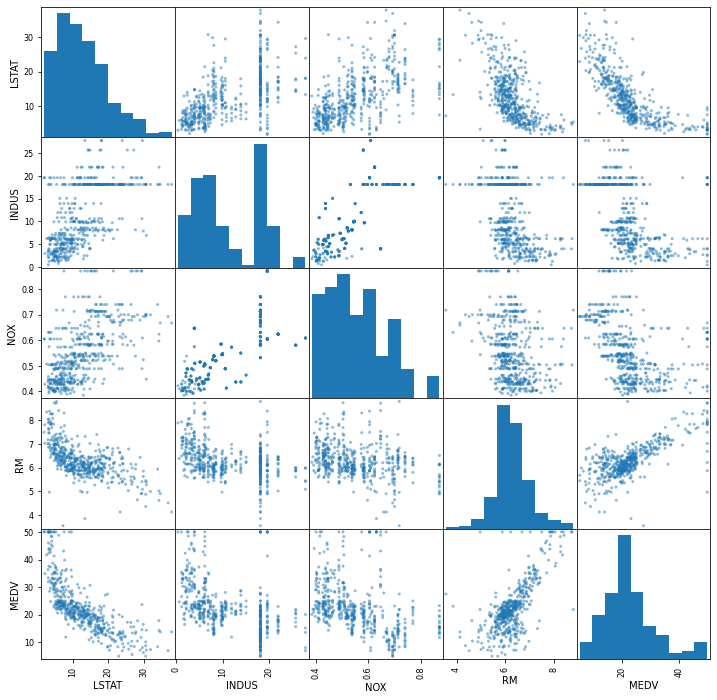

In [98]:
# Create scatter matrix

sm = scatter_matrix(df_house, figsize = (12, 12))

We can see that from the correlation matrix and scatter matrix, several variables has a high correlation between them, either positive or negative correlation. 

# Simple Linear Regression

Now, let's apply the simple linear regression to the previous data to make a prediction model. \
Basically, the model of Simple Linear Regression looks like this:

$y_i = \beta_0 + \beta_1x_i + \epsilon_i $

In [58]:
# Calculate B0 and B1 using Least Square Estimates method
# Using the statsmodels package, not the scikit-learn

df_house_slr = df_house[['MEDV', 'RM']]

model_slr = smf.ols(formula = 'MEDV ~ RM', data = df_house_slr).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        11:14:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Calculate the predicted value and error term

b0_ols = model_slr.params[0]
b1_ols = model_slr.params[1]

df_house_slr['MEDV_pred'] = b0_ols + b1_ols * df_house['RM']
df_house_slr['err'] = df_house_slr['MEDV_pred'] - df_house_slr['MEDV']
df_house_slr['squared_err'] = df_house_slr['err'] ** 2

df_house_slr

/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_45285/3093070177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_slr['MEDV_pred'] = b0_ols + b1_ols * df_house['RM']
/var/folders/6r/bbg64kh96z77l55kblwtwc8r0000gp/T/ipykernel_45285/3093070177.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_slr['err'] = df_house_slr['MEDV_pred'] - df_house_slr['MEDV']


,MEDV,RM,MEDV_pred,err,squared_err
0,24.0,6.575,25.175746,1.175746,1.382378
1,21.6,6.421,23.774021,2.174021,4.726367
2,34.7,7.185,30.728032,-3.971968,15.776528
3,33.4,6.998,29.025938,-4.374062,19.132419
4,36.2,7.147,30.382152,-5.817848,33.847354
...,...,...,...,...,...
501,22.4,6.593,25.339584,2.939584,8.641153
502,20.6,6.120,21.034286,0.434286,0.188604
503,23.9,6.976,28.825691,4.925691,24.262437
504,22.0,6.794,27.169108,5.169108,26.719674


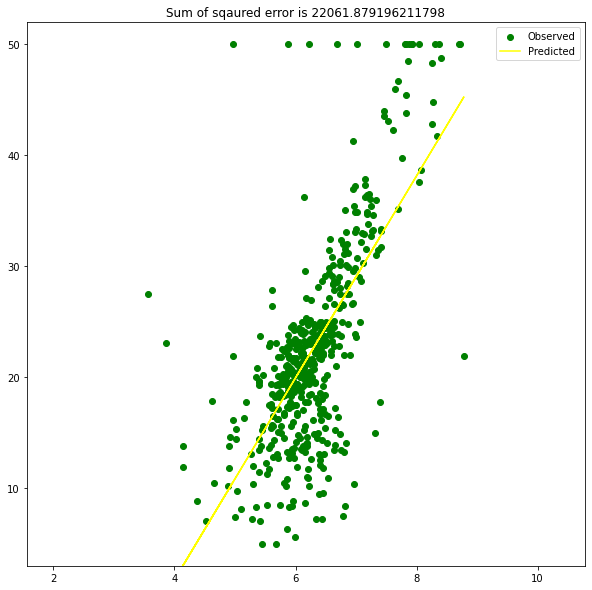

In [82]:
# Plotting the line into the scatter

plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((df_house_slr['squared_err'].sum())))
plt.scatter(df_house_slr['RM'], df_house_slr['MEDV'], color = 'g', label = 'Observed')
plt.plot(df_house_slr['RM'], df_house_slr['MEDV_pred'], color='yellow', label = 'Predicted')
plt.legend()
plt.xlim(df_house_slr['RM'].min() - 2, df_house_slr['RM'].max() + 2)
plt.ylim(df_house_slr['MEDV'].min() - 2, df_house_slr['MEDV'].max() + 2)
plt.show()

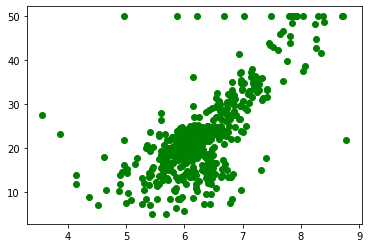

In [78]:
plt.scatter(df_house_slr['RM'], df_house_slr['MEDV'], color = 'g', label = 'Observed')


From the simple linear regression I ran before, we know several information about the data:

- R-Squared at 48% means that 52% of the MEDV variability is explained by other variables than RM.
- p-value < 0.05 means that RM significantly influences the value of MEDV.
- The predicting equation look like this : $y_i = -34.67 + 9.10x_i + \epsilon_i$

# Diagnostic of Simple Linear Regression Model

For now, let's evaluate whether we can **make statistical inference** using the model between the two linearly related variables I identified before. There are 4 assumptions about the simple linear regression:

1. Linearity 
2. Independence
3. Normality
4. Equal Variance

### Linearity

Linearity means that the mean of the response variable is a linear combination of the parameters (regression coefficients) and the predictor variables.

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

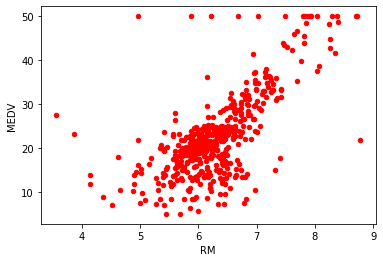

In [83]:
df_house_slr.plot(kind = 'scatter', x = 'RM', y = 'MEDV', color = 'r')

### Independence (No Autocorrelation)

This assumes that the errors of the response variables are uncorrelated with each other. \
There are 2 ways to calculate this: 
1. Residual vs. Order Plot 
2. Durbin Watson Test

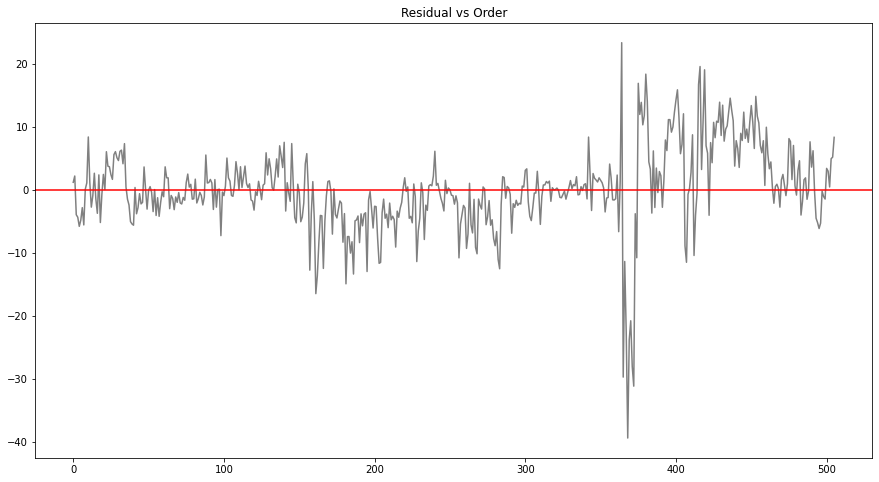

In [85]:
# 1) Residual vs. Order Plot
# Plot the error term in the y-axis = 0

plt.figure(figsize = (15, 8))
plt.title('Residual vs Order')
plt.plot(df_house_slr.index, df_house_slr['err'], color = 'grey')
plt.axhline(y = 0, color = 'red')
plt.show()

In [89]:
# 2) Durbin Watson
# Using summary function from statsmodels package

model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        12:00:37   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normality

Normality for the residual errors $\epsilon$, which represent variation in $Y$ which is not explained by the predictors.

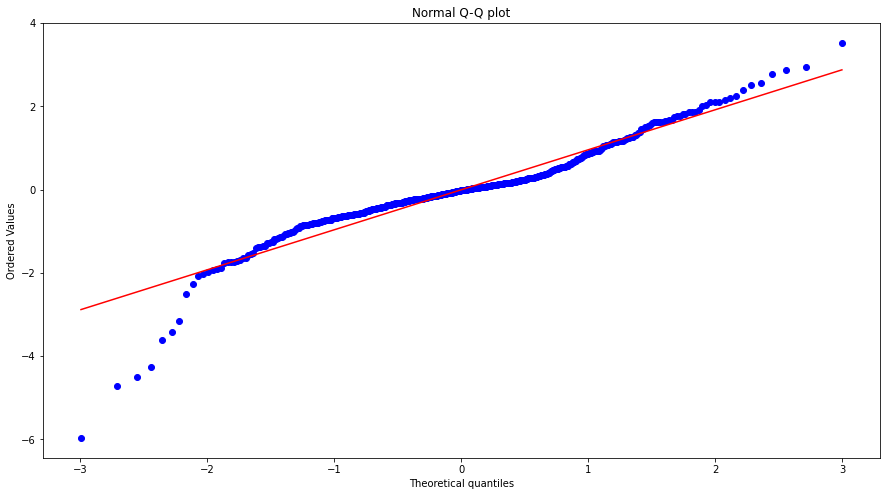

In [93]:
# Using Q-Q Plot
# Standardize the error term, and plot to the normal plot

z = (df_house_slr['err'] - df_house_slr['err'].mean()) / df_house_slr['err'].std(ddof=1)

plt.figure(figsize = (15, 8))
stats.probplot(z, dist = 'norm', plot = plt)
plt.title('Normal Q-Q plot')
plt.show()

### Equal Variance (Homoscedasticity)

Assumption when the variances are approximately the same across the samples. Unequal variances (heteroscedasticity) can affect the Type I error rate and lead to false positives. 

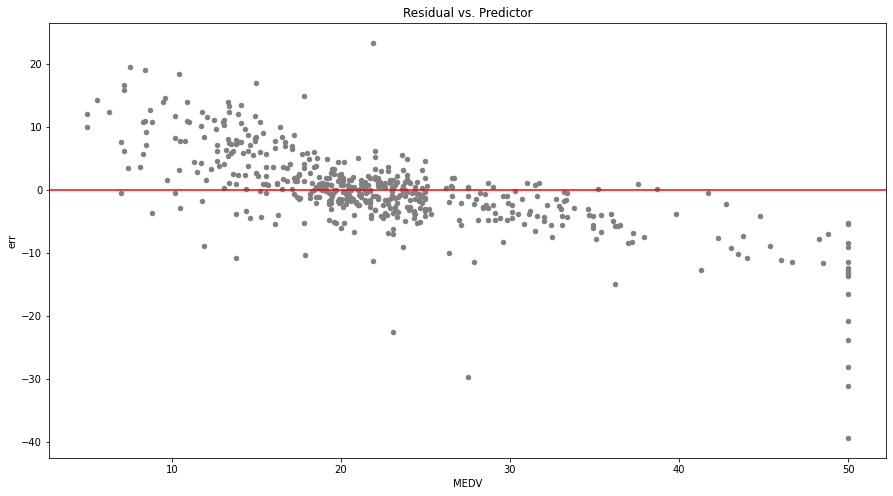

In [97]:
# Create residual vs. predictor plot

df_house_slr.plot(kind = 'scatter', x = 'MEDV', y = 'err', figsize = (15, 8), color = 'grey')
plt.title('Residual vs. Predictor')
plt.axhline(y = 0, color = 'red')
plt.show()

Because all of assumptions are violated, we cannot make a statistical inference from this simple linear regression model.

# Build Trading Model based on Multiple Linear Regression

In this model, I want to use indices from several centre of economy around the world to create prediction for SPY index price. In this model, I would like to use NYSE, DAW Jones, S&P500, NASDAQ, DAX, CAC, Nikkei, Hang Seng, and AORD as the predictor variables. All of these predictors are from US, EU, and Asia market.

In [38]:
# Import all stock market data into DataFrame

aord = pd.read_csv('data/stock_indices/ALLOrdinary.csv', index_col = 0)
nikkei = pd.read_csv('data/stock_indices/Nikkei225.csv', index_col = 0)
hsi = pd.read_csv('data/stock_indices/HSI.csv', index_col = 0)
daxi = pd.read_csv('data/stock_indices/DAXI.csv', index_col = 0)
cac40 = pd.read_csv('data/stock_indices/CAC40.csv', index_col = 0)
sp500 = pd.read_csv('data/stock_indices/SP500.csv', index_col = 0)
dji = pd.read_csv('data/stock_indices/DJI.csv', index_col = 0)
nasdaq = pd.read_csv('data/stock_indices/nasdaq_composite.csv', index_col = 0)
spy = pd.read_csv('data/stock_indices/SPY.csv', index_col = 0)

In [39]:
# Fast checking

print(spy.head())
print(nasdaq.head())
print(nikkei.head())

print(spy.shape)
print(nasdaq.shape)
print(nikkei.shape)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-01-02  146.529999  146.990005  143.880005  144.929993  116.593864   
2008-01-03  144.910004  145.490005  144.070007  144.860001  116.537567   
2008-01-04  143.339996  143.440002  140.910004  141.309998  113.681671   
2008-01-07  141.809998  142.229996  140.100006  141.190002  113.585121   
2008-01-08  142.080002  142.899994  138.440002  138.910004  111.750923   

               Volume  
Date                   
2008-01-02  204935600  
2008-01-03  125133300  
2008-01-04  232330900  
2008-01-07  234991000  
2008-01-08  326365700  
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2008-01-02  2653.909912  2661.500000  2597.810059  2609.629883  2609.629883   
2008-01-03  2611.959961  2624.270020  2592.179932  2602.679932  2602.679932 

### Data Munging

For now, I want to collect the data into one data frame for creating the model. First, create a lag price for the SPY. THen, I created the daily return price from all of these indices. 

In [40]:
# df_model for our data frame to create the modelb

df_model = pd.DataFrame(index = spy.index)

df_model['spy'] = spy['Open'].shift(-1) - spy['Open']
df_model['spy_lag1'] = df_model['spy'].shift(1)
df_model['sp500'] = sp500["Open"] - sp500['Open'].shift(1)
df_model['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
df_model['dji'] = dji['Open'] - dji['Open'].shift(1)

df_model['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
df_model['daxi'] = daxi['Open'] - daxi['Open'].shift(1)

df_model['aord'] = aord['Close']-aord['Open']
df_model['hsi'] = hsi['Close']-hsi['Open']
df_model['nikkei'] = nikkei['Close']-nikkei['Open']
df_model['Price'] = spy['Open']

df_model.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
Date,,,,,,,,,,,
2008-01-02,-1.619995,NaN,NaN,NaN,NaN,NaN,NaN,-50.100097,-71.679688,NaN,146.529999
2008-01-03,-1.570008,-1.619995,-20.419922,-41.949951,-217.70019,-71.779785,-104.450195,-2.300293,-162.750000,NaN,144.910004
2008-01-04,-1.529998,-1.570008,-3.540039,-40.879883,2.43945,5.489746,-27.990235,NaN,515.349609,-464.320313,143.339996
2008-01-07,0.270004,-1.529998,-29.940064,-56.930176,-245.40918,-111.689941,-102.709961,-27.500000,216.951171,-48.830078,141.809998
2008-01-08,-2.990006,0.270004,1.640015,-7.179931,19.75000,44.509766,33.680176,-33.899902,-354.060547,99.370117,142.080002


In [43]:
# Fast checking the data frame

df_model.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [42]:
# Cleaning the data from null value using forward fill
# Then drop the rest of the null data

df_model = df_model.fillna(method = 'ffill')
df_model = df_model.dropna()

In [44]:
# Saving the final data

path_save = 'data/stock_indices/df_model_final.csv'
df_model.to_csv(path_save)

### Make the model

Now, let's create the prediction model from the final data.

In [63]:
# Splitting the data to train and test data
# We can't randomly split the data as the data is time series
# I will divide the it 80:20 into train and test data

train, test = train_test_split(df_model, test_size = 0.20, shuffle = False)
print(train.head(3), test.head(3), train.shape, test.shape)

                 spy  spy_lag1      sp500     nasdaq        dji       cac40  \
Date                                                                          
2008-01-04 -1.529998 -1.570008  -3.540039 -40.879883    2.43945    5.489746   
2008-01-07  0.270004 -1.529998 -29.940064 -56.930176 -245.40918 -111.689941   
2008-01-08 -2.990006  0.270004   1.640015  -7.179931   19.75000   44.509766   

                  daxi       aord         hsi      nikkei       Price  
Date                                                                   
2008-01-04  -27.990235  -2.300293  515.349609 -464.320313  143.339996  
2008-01-07 -102.709961 -27.500000  216.951171  -48.830078  141.809998  
2008-01-08   33.680176 -33.899902 -354.060547   99.370117  142.080002                    spy  spy_lag1      sp500     nasdaq        dji       cac40  \
Date                                                                          
2016-07-07  1.180008  2.039993  15.989990  68.150391  116.76953  -11.700195   
2016-07

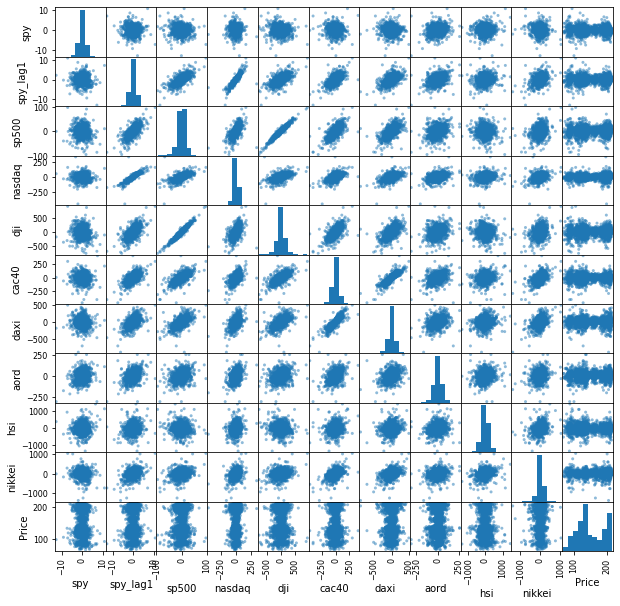

In [64]:
# Explore the train data set
# Scatter matrix for correlation between variables

sm = scatter_matrix(train, figsize = (10, 10))

In [70]:
# Correlation array
# For correlation between target variable and every predictor

corr_array = pd.DataFrame(train.iloc[:, :-1].corr()['spy'])
corr_array
corr_array.style.background_gradient(cmap = 'coolwarm')

,spy
spy,1.000000
spy_lag1,-0.052742
sp500,-0.066348
nasdaq,-0.033101
dji,-0.070557
cac40,-0.050237
daxi,-0.051115
aord,0.212683
hsi,0.066700
nikkei,-0.052581


In [72]:
# For now, let's create the regression model using multiple linear regression
# Using smf statsmodel.formula package

formula = 'spy ~ spy_lag1 + sp500 + nasdaq + dji + cac40 + aord + daxi + nikkei + hsi'
mlr = smf.ols(formula = formula, data = train).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     20.85
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           4.68e-34
Time:                        12:25:24   Log-Likelihood:                -4017.9
No. Observations:                2141   AIC:                             8056.
Df Residuals:                    2131   BIC:                             8112.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0352      0.034      1.024      0.306      -0.032       0.103
spy_lag1      -0.0993      0.052     -1.921      0.055      -0.201       0.002
sp500          0.0109      0.011      1.019      0.308      -0.010       0.032
nasdaq        -0.0006      0.002     -0.305      0.760      -0.004       0.003
dji           -0.0014      0.001     -1.262      0.207      -0.003       0.001
cac40         -0.0013      0.001     -1.028      0.304      -0.004       0.001
aord           0.0102      0.001     12.562      0.000       0.009       0.012
daxi          -0.0006      0.001     -0.886      0.376      -0.002       0.001
nikkei        -0.0006      0.000     -2.477      0.013      -0.001      -0.000
hsi            0.0004      0.000      2.637      0.008       0.000       0.001
==============================================================================
Omnibus:                      207.130   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1266.080
Skew:                          -0.215   Prob(JB):                    1.19e-275
Kurtosis:                       6.743   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Make Prediction

In [73]:
train['spy_pred'] = mlr.predict(train)
test['spy_pred'] = mlr.predict(train)

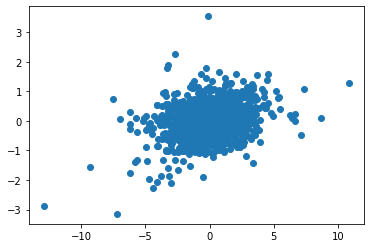

In [74]:
plt.scatter(train['spy'], train['spy_pred'])

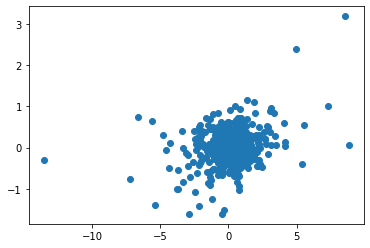

In [75]:
plt.scatter(test['spy'], test['spy_pred'])

### Evaluation of the Model

For the last thing, let's evaluate our model using RMSE and Adjusted R-Squared.

In [76]:
### Evaluation Statistic Standard
# RMSE - Root Mean Squared Error, Adjusted R^2

def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR / SST
    adjustR2 = 1 - (1 - r2)*(data.shape[0] - 1) / (data.shape[0] - model_k - 1)
    RMSE = (SSE / (data.shape[0] - model_k - 1))**0.5
    return adjustR2, RMSE

In [77]:
# Create the assessment table

def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index =['R2', 'RMSE'], columns = ['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [79]:
# Get the assessment table for our model
# R-Squared around 7-8% is enough in the stock model for the prediction
# As there are many variables that could explain the stock price

assessTable(test, train, mlr, 9, 'spy')

,Train,Test
R2,0.077061,0.053937
RMSE,1.584152,1.628624


# Application to the Real Stock Price

Now, I will try to apply the model in the real stock price and see how the model perform in the real life.

In [87]:
# Calculate cummulative profit for train model

train['Order'] = [1 if sig > 0 else -1 for sig in train['spy_pred']]
train['Profit'] = train['spy'] * train['Order']

train['Wealth'] = train['Profit'].cumsum()
print('Total profit made in Train: ', train['Profit'].sum())

Total profit made in Train:  555.4299390000008


In [99]:
# Profit per day

print('Total profit per day from train: ', test['Profit'].sum() / 2141)

Total profit per day from train:  0.055235748715553534


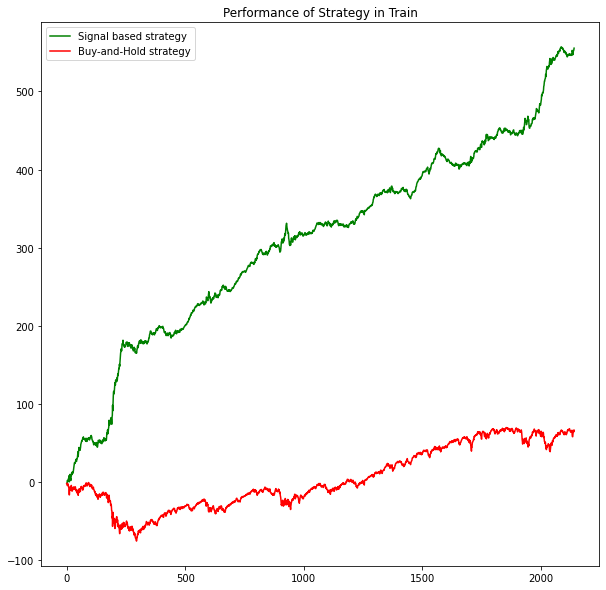

In [89]:
# Plot the cummulative profit for train model

plt.figure(figsize = (10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(train['Wealth'].values, color = 'green', label = 'Signal based strategy')
plt.plot(train['spy'].cumsum().values, color = 'red', label = 'Buy-and-Hold strategy')
plt.legend()
plt.show()

In [90]:
# Calculate cummulative profit for test model

test['Order'] = [1 if sig > 0 else -1 for sig in test['spy_pred']]
test['Profit'] = test['spy'] * test['Order']

test['Wealth'] = test['Profit'].cumsum()
print('Total profit made in Test: ', test['Profit'].sum())

Total profit made in Test:  118.25973800000011


In [96]:
# Profit per day

print('Total profit per day from test: ', test['Profit'].sum() / 536)

Total profit per day:  0.220633839552239


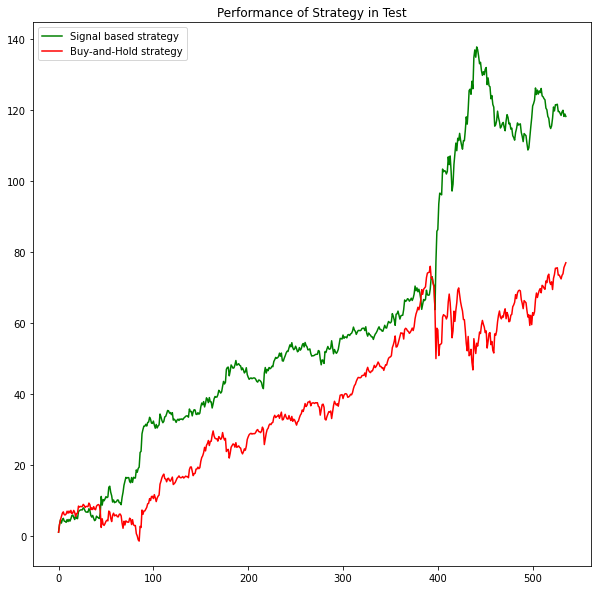

In [93]:
# Plot the cummulative profit for test model

plt.figure(figsize = (10, 10))
plt.title('Performance of Strategy in Test')
plt.plot(test['Wealth'].values, color = 'green', label = 'Signal based strategy')
plt.plot(test['spy'].cumsum().values, color = 'red', label = 'Buy-and-Hold strategy')
plt.legend()
plt.show()

### Evaluation of the Model - Practical Standard

Now, for the last, let's evaluate this model using two common practical standards - **Sharpe Ratio**, **Maximum Drawdown**.


In [ ]:
train['Wealth'] = train['Wealth'] + train.loc[train.index[0], 'Price']
test['Wealth'] = test['Wealth'] + test.loc[test.index[0], 'Price']

In [111]:
# Sharpe Ratio is average return earned in excess of the risk-free rate per unit of volatility or total risk
# The risk-free rate could be a U.S. Treasury rate or yield, such as the one-year or two-year Treasury yield
# A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns.

# Sharpe Ratio on Train data

train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
dailyr = train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean() / dailyr.std(ddof = 1))
print('Yearly Sharpe Ratio is ', (252**0.5) * dailyr.mean() / dailyr.std(ddof = 1))

Daily Sharpe Ratio is  0.028262135601339434
Yearly Sharpe Ratio is  0.4486474939243743


In [112]:
# Sharpe Ratio in Test data
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr = test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean() / dailyr.std(ddof = 1))
print('Yearly Sharpe Ratio is ', (252**0.5) * dailyr.mean()/dailyr.std(ddof = 1))

Daily Sharpe Ratio is  0.11770809338996138
Yearly Sharpe Ratio is  1.8685580544564215


In [113]:
# Maximum Drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained
# It only measures the size of the largest loss, without taking into consideration the frequency of large losses


# Maximum Drawdown in Train data
train['Peak'] = train['Wealth'].cummax()
train['Drawdown'] = (train['Peak'] - train['Wealth']) / train['Peak']
print('Maximum Drawdown in Train is', train['Drawdown'].max())

Maximum Drawdown in Train is 0.9375021369508904


In [107]:
# Maximum Drawdown in Test data
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth']) / test['Peak']
print('Maximum Drawdown in Test is', test['Drawdown'].max())

Maximum Drawdown in Test is 0.44913179749940846
